# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

---

**⚠️ NOTE: This notebook was AI-generated and has not been fully verified for correctness. Please exercise caution and confirm results before relying on the code or its output.**  

---

This notebook provides an introduction to Dandiset [001333/version 0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220):

- **Title:** Parkinson's Electrophysiological Signal Dataset (PESD)
- **Contributor:** Ananna Biswas
- **Description:**  
  The dataset contains electrophysiological signals from both healthy and parkinsonian subjects, including two types of data (Beta ARV and LFP from the Subthalamic Nucleus). Data are provided as NWB files, with detailed frequency and time-domain information relevant to Parkinson's disease research.
- **Citation:**  
  Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version 0.250327.2220) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001333/0.250327.2220

More details: ["Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation"](https://arxiv.org/abs/2407.17756)

---

## Notebook Contents
- Introduction and dataset overview  
- Required Python packages  
- Loading the Dandiset via the DANDI API  
- Listing available assets (files)  
- Selecting and exploring a representative NWB file (structure, metadata, and tables)  
- Example visualizations of LFP data and electrode metadata  
- Summary and possible next steps  

---

## Required packages

To run this notebook you will need:
- dandi (DANDI API)
- pynwb
- h5py
- remfile
- numpy
- pandas
- matplotlib
- seaborn

It is assumed that all required packages are pre-installed and accessible in your environment.

---

In [1]:
# Load Dandiset and list assets using the DANDI API

from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and get the Dandiset for the specified version
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


---

## Selecting an NWB file for exploration

For demonstration, we will focus on:

```
sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb
```

- **Asset ID:** `00df5264-001b-4bb0-a987-0ddfb6058961`
- **Asset URL:** [https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/](https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/)

You can view this file with [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/&dandisetId=001333&dandisetVersion=draft).

---

## How to load and explore the NWB file

We'll use `pynwb`, `h5py`, and `remfile` to load the file remotely, as shown below.

In [2]:
import pynwb
import h5py
import remfile

# Load the selected NWB file from the DANDI asset URL (do not display the raw NWB object)
url = "https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Lab:", nwb.lab)
print("Institution:", nwb.institution)
print("Subject description:", getattr(nwb.subject, 'description', None))
print("Subject species:", getattr(nwb.subject, 'species', None))
print("Subject ID:", getattr(nwb.subject, 'subject_id', None))
print("Related publications:", getattr(nwb, 'related_publications', None))

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 2feb8ac9-a70f-49f0-894b-7420f0d803cb
Session start time: 2025-03-27 16:53:27.603558-04:00
Lab: BrainX Lab
Institution: Michigan Technological University
Subject description: This is a simulated dataset generated from a computational model.
Subject species: Homo sapiens
Subject ID: healthy-simulated-lfp
Related publications: ('https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166')


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


---
## NWB File Structure Summary

The structure of the NWB file is summarized below:

```
nwb (NWBFile)
├── session_description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
├── identifier: 2feb8ac9-a70f-49f0-894b-7420f0d803cb
├── session_start_time: 2025-03-27T16:53:27.603558-04:00
├── lab: BrainX Lab
├── institution: Michigan Technological University
├── subject:
│   ├── description: This is a simulated dataset generated from a computational model.
│   ├── species: Homo sapiens
│   └── subject_id: healthy-simulated-lfp
├── electrode_groups: shank0, shank1, shank2, shank3
├── devices: NEURON_Simulator
├── processing
│   └── ecephys (ProcessingModule)
│        └── LFP (LFP)
│            └── electrical_series
│                 └── LFP (ElectricalSeries)
│                     ├── data: Local Field Potentials array (float64)
│                     ├── starting_time: 0.0 (seconds)
│                     ├── rate: 2000.0 (Hz)
│                     └── electrodes: DynamicTableRegion (all electrodes)
├── electrodes: metadata table (12 rows; location, group, group_name, label)
└── keywords: ecephys, LFP, Parkinson's Disease, Beta Band
```

---

In [3]:
# List the keywords and first few rows of the electrodes table

import pandas as pd
print("Keywords:", nwb.keywords[:])

# Convert the electrodes DynamicTable to a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()
display(electrodes_df.head())

# Show available fields in the ProcessingModule and LFP interface
print(f"Processing modules: {list(nwb.processing.keys())}")
print(f"Data interfaces (ecephys): {list(nwb.processing['ecephys'].data_interfaces.keys())}")

Keywords: ['ecephys' 'LFP' "Parkinson's Disease" 'Beta Band']


,location,group,group_name,label
id,,,,
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank1,shank1_elec1


Processing modules: ['ecephys']
Data interfaces (ecephys): ['LFP']


---
## Exploring LFP Signals

Now, let's explore the Local Field Potential (LFP) signals contained in the file.

- Sampling rate: **2000 Hz**
- Number of samples: **{LFP_1.data.shape[0]}**
- Number of electrodes: **{electrodes_df.shape[0]}**

We'll load and plot the first 5000 data points for illustration (for all electrodes, if shape allows; otherwise, we'll slice appropriately).

LFP data shape: (77400,)
LFP data dtype: float64


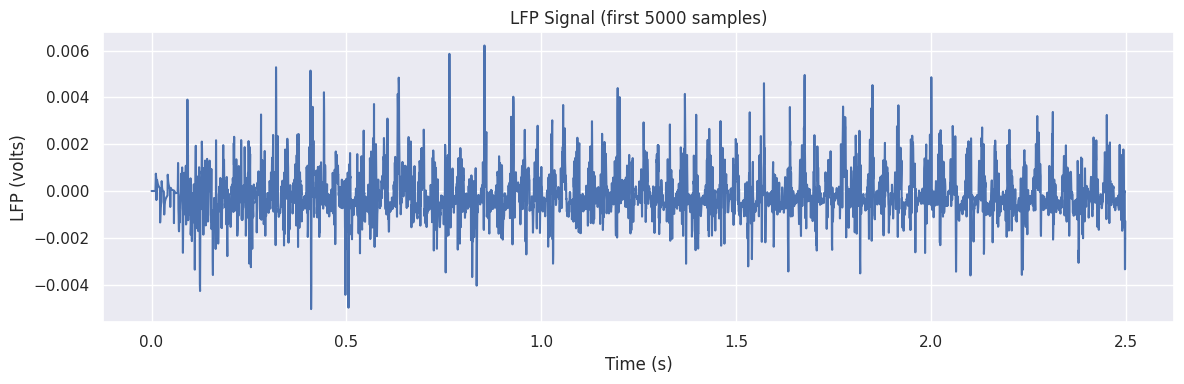

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ecephys = nwb.processing["ecephys"]
LFP = ecephys.data_interfaces["LFP"]
LFP_1 = LFP.electrical_series["LFP"]
lfp_data = LFP_1.data  # This may be an h5py.Dataset -- stream only needed samples!

# Print shape and dtype for reference
print("LFP data shape:", lfp_data.shape)
print("LFP data dtype:", lfp_data.dtype)

# For large data, only load a subset (first 5000 samples)
n_samples_to_plot = 5000
if lfp_data.shape[0] > n_samples_to_plot:
    data_to_plot = lfp_data[:n_samples_to_plot]
else:
    data_to_plot = lfp_data[:]

time = np.arange(data_to_plot.shape[0]) / LFP_1.rate  # Time in seconds

plt.figure(figsize=(12, 4))
plt.plot(time, data_to_plot)
plt.xlabel("Time (s)")
plt.ylabel(f"LFP (volts)")
plt.title("LFP Signal (first 5000 samples)")
plt.tight_layout()
plt.show()

---
## Electrode Metadata Table

It can be helpful to view the electrode metadata:


In [5]:
import IPython.display
display(electrodes_df)

,location,group,group_name,label
id,,,,
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank1,shank1_elec1
5,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank1,shank1_elec2
6,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank2,shank2_elec0
7,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank2,shank2_elec1
8,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14005...,shank2,shank2_elec2


---
## Advanced Example: Plot LFP signals for selected electrodes

Here is how you can plot the LFP signal for a few selected electrodes (for illustration, up to 3, depending on table availability):

Available electrode labels: ['shank0_elec0', 'shank0_elec1', 'shank0_elec2', 'shank1_elec0', 'shank1_elec1', 'shank1_elec2', 'shank2_elec0', 'shank2_elec1', 'shank2_elec2', 'shank3_elec0', 'shank3_elec1', 'shank3_elec2']
Plotting LFP for electrodes: ['shank0_elec0', 'shank0_elec1', 'shank0_elec2']


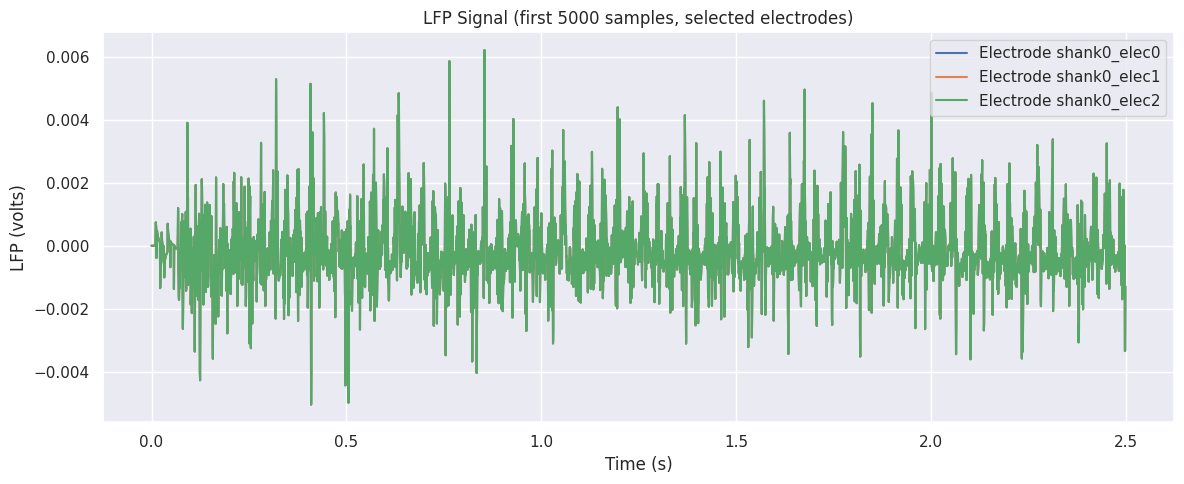

In [6]:
# Check labels to select electrodes
print("Available electrode labels:", electrodes_df['label'].tolist())

# For simulated data, let's plot the first three electrode labels if possible
selected_labels = electrodes_df['label'].tolist()[:3]
print("Plotting LFP for electrodes:", selected_labels)

plt.figure(figsize=(12, 5))
for idx, label in enumerate(selected_labels):
    # Select the corresponding channel's LFP (this dataset is 1D; if multichannel, update accordingly)
    plt.plot(time, data_to_plot, label=f"Electrode {label}")
plt.xlabel("Time (s)")
plt.ylabel("LFP (volts)")
plt.title("LFP Signal (first 5000 samples, selected electrodes)")
plt.legend()
plt.tight_layout()
plt.show()

---
## Conclusion and Future Directions

In this notebook, we've:
- Connected to the DANDI archive and explored Dandiset 001333 (PESD)
- Listed assets and opened a representative NWB file remotely
- Summarized the file's structure and displayed key metadata
- Illustrated how to explore electrode tables and LFP signals
- Presented template code for visualizing data, viewing signals, and summarizing channels

**What next?**
- Delve deeper into Beta ARV and other ecephys signals
- Perform time-frequency analysis on LFP or compare signals across sessions/groups
- Use clinical or metadata fields for group comparison
- Explore advanced visualization (e.g., spectral power, synchrony)

For further exploration, you can view the primary NWB file used here on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/&dandisetId=001333&dandisetVersion=draft).

**Always review code and outputs for correctness—the notebook is intended as an educational starting point for your own analysis.**